## **CAPSTONE PROJECT BENGKEL CODING DATA SCIENCE**

### Prediksi Penyakit Jantung

Project ini berisi tentang pemodelan untuk memprediksi penyakit jantung menggunakan dataset [Heart Disease](http://archive.ics.uci.edu/dataset/45/heart+disease) dan deployment menggunakan streamlit

Project ini terdiri dari beberapa tahapan diantaranya:

1. Pengumpulan Data
2. Menelaah Data
3. Validasi Data
4. Menentukan Objek Data
5. Membersihkan Data
6. Konstruksi Data
7. Pemodelan
8. Evaluasi
9. Deployment
10. Kesimpulan


### **1.Pengumpulan Data**


Data yang digunakan adalah [hungarian.data](datasets\hungarian.data)


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import itertools

In [2]:
# Importing the dataset
dir = 'datasets/hungarian.data'
with open(dir, encoding='Latin1') as file:
    lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

### **2. Menelaah Data**


In [3]:
data = itertools.takewhile( 
  lambda x: len(x) == 76, 
  (' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

# Converting the data into a DataFrame
df = pd.DataFrame(data)
df.shape

(294, 76)

Dataset ini terdiri dari 294 baris dan 76 kolom


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


Dari dokumentasi dataset, disebutkan bahwa:

- kolom pertama(#0) adalah ID pasien
- kolom terakhir(#76) adalah nama terakhir pasien

Kedua kolom tersebut merupakan data dummy oleh karena itu hapus kolom pertama dan terakhir dari dataset.


In [5]:
df = df.drop(df.columns[0], axis=1)   # Menghapus kolom pertama
df = df.iloc[:, :-1]                  # Menghapus kolom terakhir
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0,40,1,1,0,0,-9,2,140,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
1,0,49,0,1,0,0,-9,3,160,1,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
2,0,37,1,1,0,0,-9,2,130,0,...,-9,-9,-9,1,1,1,1,1,-9.,-9.
3,0,48,0,1,1,1,-9,4,138,0,...,-9,2,-9,1,1,1,1,1,-9.,-9.
4,0,54,1,1,0,1,-9,3,150,0,...,-9,1,-9,1,1,1,1,1,-9.,-9.


### **3. Validasi Data**


Dalam dataset ini nilai -9.0 merupakan nilai NULL oleh karena itu ubah agar sesuai dengan kondisi tersebut


In [6]:
df = df.astype(float)                # Mengubah tipe data menjadi float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

In [7]:
df.replace(-9.0, np.nan, inplace=True)  # Mengganti nilai -9.0 menjadi NaN
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


### **4. Menentukan Objek Data**


Dari kolom yang ada hanya 14 kolom yang digunakan sebagai fitur, yaitu:

1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num/target)


In [8]:
# memilih kolom yang akan digunakan
df = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]
df.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [9]:
# Mengganti nama kolom
df.columns = [
  'age', 'sex', 'cp', 'trestbps', 'chol',
  'fbs', 'restecg', 'thalach', 'exang', 
  'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


### **5. Membersihkan Data**


#### - Menghilangkan nilai null/missing value


In [10]:
# Menghitung jumlah missing value pada setiap kolom
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Dari 14 kolom terdapat beberapa kolom yang memiliki missing value, namun terdapat 3 kolom dengan missing value yang tinggi, yaitu:
|Kolom|Missing Values|
|:---:|:---------:|
|slope|190/294 |
|ca |290/294 |
|thal |266/294 |

Oleh karena itu lebih baik untuk menghapus kolom tersebut


In [11]:
# Menghapus baris yang mengandung missing value tinggi
df = df.drop(['slope', 'ca', 'thal'], axis=1)
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dan untuk kolom yang masih memiliki missing value maka diisi dengan nilai mean masing-masing kolom


In [12]:
df[df['exang'].isnull()] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,0.0


In [13]:
meanTrestbps = df['trestbps'].dropna()
meanChol = df['chol'].dropna()
meanFbs = df['fbs'].dropna()
meanRestcg = df['restecg'].dropna()
meanThalach = df['thalach'].dropna()
meanExang = df['exang'].dropna()

meanTrestbps = meanTrestbps.astype(float)
meanChol = meanChol.astype(float)
meanFbs = meanFbs.astype(float)
meanRestcg = meanRestcg.astype(float)
meanThalach = meanThalach.astype(float)
meanExang = meanExang.astype(float)

# Menghitung mean dari setiap kolom
meanTrestbps = round(meanTrestbps.mean())
meanChol = round(meanChol.mean())
meanFbs = round(meanFbs.mean())
meanRestcg = round(meanRestcg.mean())
meanThalach = round(meanThalach.mean())
meanExang = round(meanExang.mean())

In [14]:
fill_values = {
  'trestbps': meanTrestbps, 'chol': meanChol, 'fbs': meanFbs,
  'restecg': meanRestcg, 'thalach': meanThalach, 'exang': meanExang
}

# Mengisi missing value dengan mean masing-masing kolom
df = df.fillna(value=fill_values)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

#### - Menghilangkan nilai duplikat


In [15]:
# Menghitung nilai duplikat
print("Jumlah nilai duplikat: ", df.duplicated().sum())

Jumlah nilai duplikat:  1


In [16]:
# Melihat nilai duplikat
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [17]:
# Menghapus nilai duplikat
df.drop_duplicates(inplace=True)
print("Jumlah nilai duplikat: ", df.duplicated().sum())

Jumlah nilai duplikat:  0


#### - Melihat korelasi antar fitur


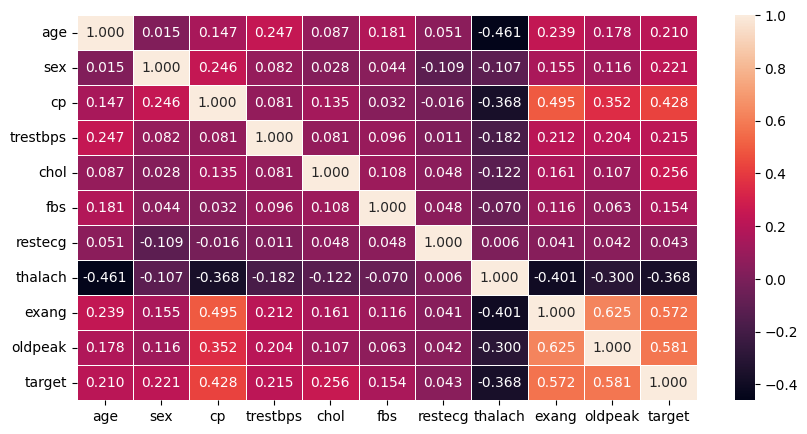

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# melihat korelasi antar kolom dengan heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, fmt='.3f', linewidths=0.5)
plt.show()

### **6. Konstruksi Data**


#### - Menyesuaikan semua tipe data


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


Namun pada dataset ini sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali.


#### - Menangani data tidak seimbang (Oversampling)


In [20]:
df['target'].value_counts()

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

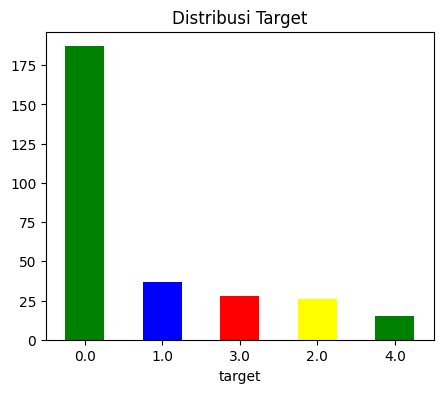

In [21]:
# Menampilkan distribusi target
plt.figure(figsize=(5, 4))
df.value_counts('target').plot(kind='bar', color=['green', 'blue', 'red', 'yellow', 'green'])
plt.title('Distribusi Target')
plt.xticks(rotation=0)
plt.show()

In [22]:
from imblearn.over_sampling import SMOTE

# Memisahkan atribut dan label
X = df.drop('target', axis=1).values
y = df.iloc[:, -1]

# Melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

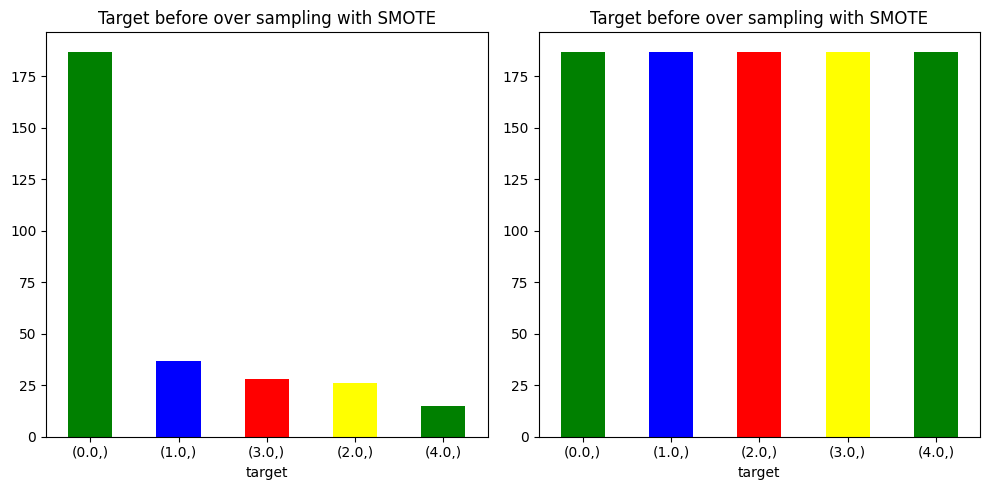

In [23]:
plt.figure(figsize=(10, 5))

# Sebelum SMOTE
plt.subplot(1, 2, 1)
before_smote = pd.DataFrame(data=y)
before_smote.value_counts().plot(kind='bar', color=['green', 'blue', 'red', 'yellow', 'green'])
plt.title('Target before over sampling with SMOTE')
plt.xticks(rotation=0)

# Setelah SMOTE
plt.subplot(1, 2, 2)
after_smote = pd.DataFrame(data=y_smote)
after_smote.value_counts().plot(kind='bar', color=['green', 'blue', 'red', 'yellow', 'green'])
plt.title('Target before over sampling with SMOTE')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [24]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


In [25]:
df.to_csv('datasets/cleaned_dataframe.csv', index=False)

#### - Normalisasi (Normalization)


In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_smote_normalized = sc.fit_transform(X_smote)

df_smote_normalized = pd.DataFrame(X_smote_normalized)
df_smote_normalized.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7. Pemodelan


#### - Dataset Splitting


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


# Splitting the dataset into the Training set and Test set (over sampling)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# Splitting the dataset into the Training set and Test set (over sampling + normalization)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X_smote_normalized, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

#### - Modeling with K-Nearest Neighbors (KNN)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# KKNN Model (over sampling)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pickle.dump(knn, open('models/knn.pkl', 'wb'))
y_pred_knn = knn.predict(X_test)

print("K-Nearest Neighbors (KNN) Model")
print("(Over Sampling)")
print("Akurasi: ", format(accuracy_score(y_test, y_pred_knn), '.3f'))
print("Classification Report: \n", classification_report(y_test, y_pred_knn))

# KKNN Model (over sampling + normalization)
knn_normalization = KNeighborsClassifier(n_neighbors=3)
knn_normalization.fit(X_train_normalized, y_train_normalized)
pickle.dump(knn_normalization, open('models/knn_normalization.pkl', 'wb'))
y_pred_knn_normalization = knn_normalization.predict(X_test_normalized)

print("(Over Sampling + Normalization)")
print("Akurasi: ", format(accuracy_score(y_test_normalized, y_pred_knn_normalization), '.3f'))
print("Classification Report: \n", classification_report(y_test_normalized, y_pred_knn_normalization))

K-Nearest Neighbors (KNN) Model
(Over Sampling)
Akurasi:  0.754
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187

(Over Sampling + Normalization)
Akurasi:  0.861
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy           

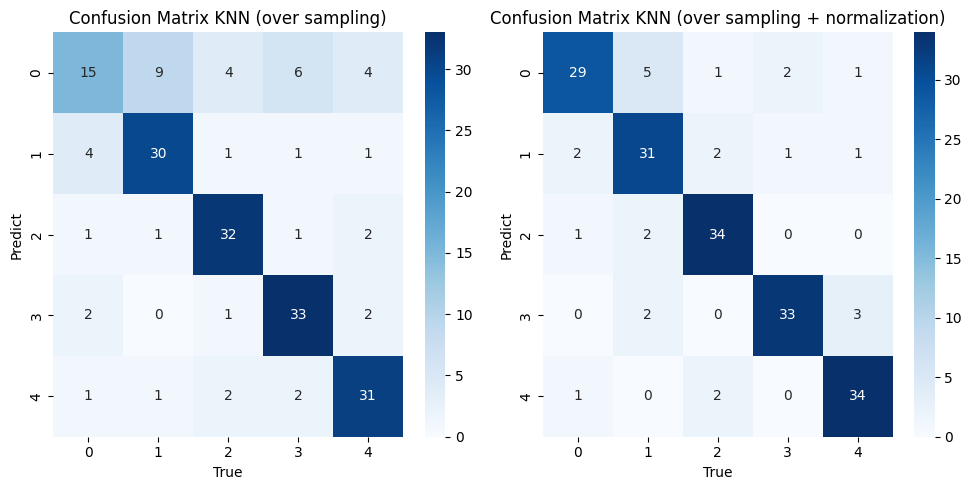

In [29]:
plt.figure(figsize=(10, 5))

# Confusion Matrix (over sampling)
cm = confusion_matrix(y_test, y_pred_knn)
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN (over sampling)')
plt.xlabel('True')
plt.ylabel('Predict')

# Confusion Matrix (over sampling + normalization)
cm_normalization = confusion_matrix(y_test_normalized, y_pred_knn_normalization)
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalization, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN (over sampling + normalization)')
plt.xlabel('True')
plt.ylabel('Predict')

plt.tight_layout()
plt.show()

#### - Modeling with Random Forest (RFC)


In [30]:
from sklearn.ensemble import RandomForestClassifier

# RFC Model (over sampling)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
pickle.dump(rfc, open('models/rfc.pkl', 'wb'))
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Model")
print("(Over Sampling)")
print("Akurasi: ", format(accuracy_score(y_test, y_pred_rfc), '.3f'))
print("Classification Report: \n", classification_report(y_test, y_pred_rfc))

# RFC Model (over sampling + normalization)
rfc_normalization = RandomForestClassifier(random_state=42)
rfc_normalization.fit(X_train_normalized, y_train_normalized)
pickle.dump(rfc_normalization, open('models/rfc_normalization.pkl', 'wb'))
y_pred_rfc_normalization = rfc_normalization.predict(X_test_normalized)

print("(Over Sampling + Normalization)")
print("Akurasi: ", format(accuracy_score(y_test_normalized, y_pred_rfc_normalization), '.3f'))
print("Classification Report: \n", classification_report(y_test_normalized, y_pred_rfc_normalization))

Random Forest Model
(Over Sampling)
Akurasi:  0.920
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187

(Over Sampling + Normalization)
Akurasi:  0.920
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                       

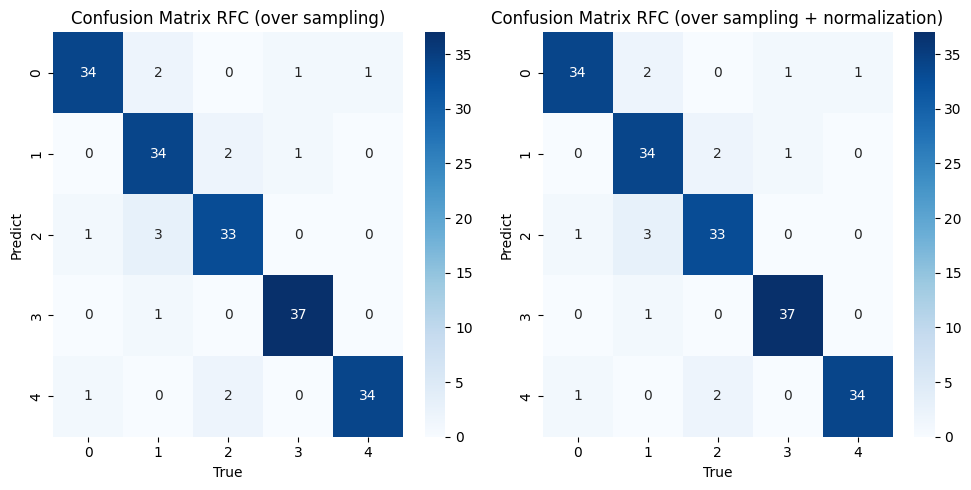

In [31]:
plt.figure(figsize=(10, 5))

# Confusion Matrix (over sampling)
cm = confusion_matrix(y_test, y_pred_rfc)
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix RFC (over sampling)')
plt.xlabel('True')
plt.ylabel('Predict')

# Confusion Matrix (over sampling + normalization)
cm_normalization = confusion_matrix(y_test_normalized, y_pred_rfc_normalization)
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalization, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix RFC (over sampling + normalization)')
plt.xlabel('True')
plt.ylabel('Predict')

plt.tight_layout()
plt.show()

#### - Modeling with XGBoost (XGB)


In [32]:
from xgboost import XGBClassifier

# XGB Model (over sampling)
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
pickle.dump(xgb, open('models/xgb.pkl', 'wb'))
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Model")
print("(Over Sampling)")
print("Akurasi: ", format(accuracy_score(y_test, y_pred_xgb), '.3f'))
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))

# XGB Model (over sampling + normalization)
xgb_normalization = XGBClassifier(random_state=42)
xgb_normalization.fit(X_train_normalized, y_train_normalized)
pickle.dump(xgb_normalization, open('models/xgb_normalization.pkl', 'wb'))
y_pred_xgb_normalization = xgb_normalization.predict(X_test_normalized)

print("(Over Sampling + Normalization)")
print("Akurasi: ", format(accuracy_score(y_test_normalized, y_pred_xgb_normalization), '.3f'))
print("Classification Report: \n", classification_report(y_test_normalized, y_pred_xgb_normalization))

XGBoost Model
(Over Sampling)
Akurasi:  0.904
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.81      0.86        37
         2.0       0.87      0.89      0.88        37
         3.0       0.93      0.97      0.95        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187

(Over Sampling + Normalization)
Akurasi:  0.904
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        38
         1.0       0.91      0.81      0.86        37
         2.0       0.87      0.89      0.88        37
         3.0       0.93      0.97      0.95        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.

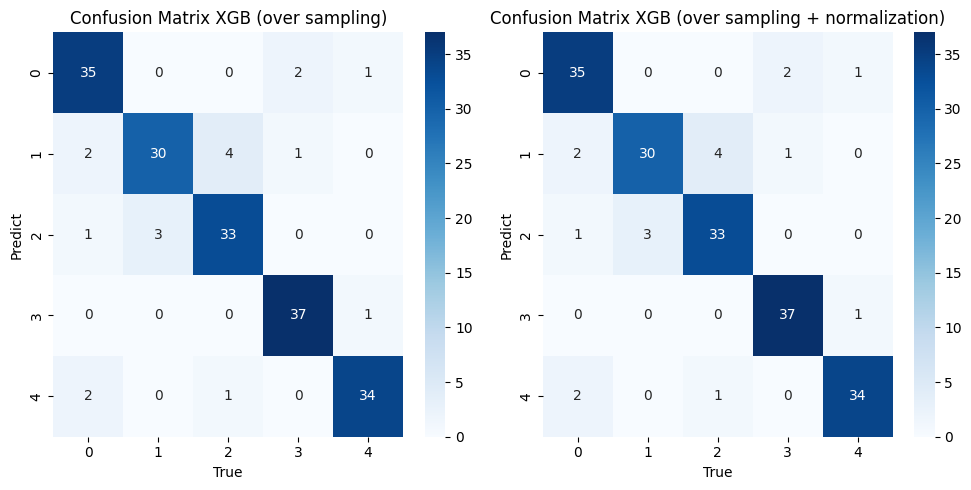

In [33]:
plt.figure(figsize=(10, 5))

# Confusion Matrix (over sampling)
cm = confusion_matrix(y_test, y_pred_xgb)
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGB (over sampling)')
plt.xlabel('True')
plt.ylabel('Predict')

# Confusion Matrix (over sampling + normalization)
cm_normalization = confusion_matrix(y_test_normalized, y_pred_xgb_normalization)
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalization, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGB (over sampling + normalization)')
plt.xlabel('True')
plt.ylabel('Predict')

plt.tight_layout()
plt.show()

### 8. Evaluasi


#### - Komporasi Model (Oversampling)


In [34]:
model_comp1 = pd.DataFrame({
  'Model': ['KNN', 'RFC', 'XGB'],
  'Akurasi': [round(accuracy_score(y_test, y_pred_knn)*100, 1), round(accuracy_score(y_test, y_pred_rfc)*100, 1), round(accuracy_score(y_test, y_pred_xgb)*100, 1)],
})
print("Model Comparison (Over Sampling)")
model_comp1.head()

Model Comparison (Over Sampling)


,Model,Akurasi
0,KNN,75.4
1,RFC,92.0
2,XGB,90.4


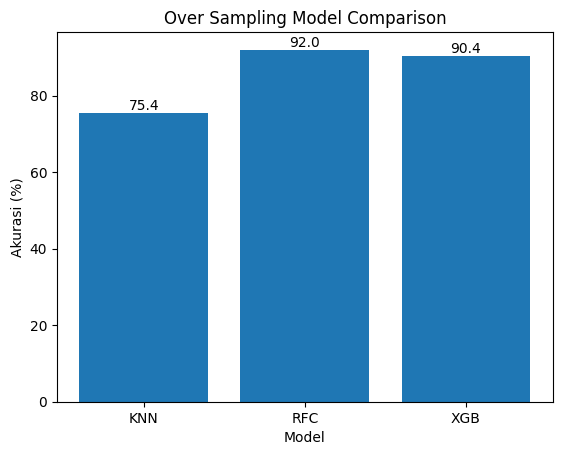

In [35]:
bars = plt.bar(model_comp1['Model'], model_comp1['Akurasi'])
plt.xlabel('Model')
plt.ylabel('Akurasi (%)')
plt.title('Over Sampling Model Comparison')
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

#### - Komparasi Model (Oversampling + Normalization)


In [36]:
model_comp2 = pd.DataFrame({
  'Model': ['KNN', 'RFC', 'XGB'],
  'Akurasi': [round(accuracy_score(y_test, y_pred_knn_normalization)*100, 1), round(accuracy_score(y_test, y_pred_rfc_normalization)*100, 1), round(accuracy_score(y_test, y_pred_xgb_normalization)*100, 1)],
})
print("Model Comparison (Over Sampling + Normalization)")
model_comp2.head()

Model Comparison (Over Sampling + Normalization)


,Model,Akurasi
0,KNN,86.1
1,RFC,92.0
2,XGB,90.4


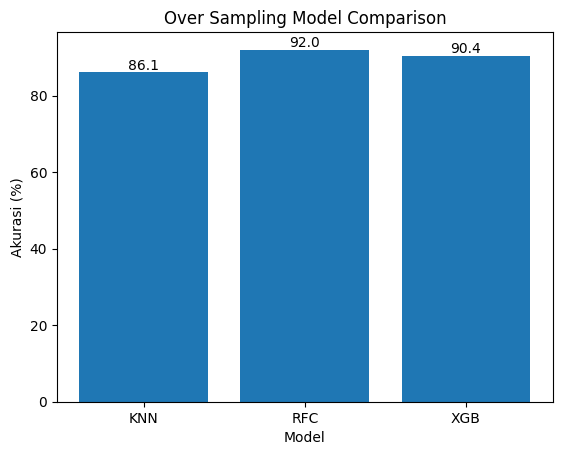

In [37]:
bars = plt.bar(model_comp2['Model'], model_comp2['Akurasi'])
plt.xlabel('Model')
plt.ylabel('Akurasi (%)')
plt.title('Over Sampling Model Comparison')
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

### 9. Deployment


Dari hasil evaluasi, deployment dilakukan menggunakan model **Random Forest** yang memiliki akurasi tertinggi yaitu **92.0 %** dan menggunakan streamlit yang dapat diakses pada [Prediksi Penyakit Jantung](https://prediksi-penyakit-jantung-capstone.streamlit.app/) atau tersimpan di repository [heart-disease-capstone](https://github.com/maoelanaAs/heart-disease-capstone)


### 10. Kesimpulan


Tahap akhir dari project ini adalah kesimpulan. Berdasarkan project yang sudah dilakukan, dapat disimpulkan bahwa model **Random Forest** dengan penerapan _oversampling_ dan _normalization_, menunjukkan akurasi paling tinggi mencapai **92.0 %**. Hasil ini menunjukkan bahwa metode tersebut dapat memprediksi keberadaan penyakit jantung berdasarkan sejumlah atribut pasien dengan baik.
